In [ ]:
#|default_exp app

In [10]:
!pip install nbdev

In [1]:
#|export

from fastai.vision.all import *

import pathlib
import gradio as gr


def is_cat(x): return x[0].isupper()

c:\Users\Richard\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import PIL

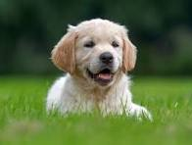

In [4]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [3]:
#|export
# Check if you are on a Windows system
if sys.platform == 'win32': 
    # Set the base PosixPath to WindowsPath
    pathlib.PosixPath = pathlib.WindowsPath
pathlib.PosixPath

pathlib.WindowsPath

In [5]:
#|export
learn =load_learner('cat_dog_model.pkl')

In [12]:
%time learn.predict(im)

CPU times: total: 62.5 ms
Wall time: 137 ms


('True', TensorImage(1), TensorImage([2.6231e-04, 9.9974e-01]))

In [6]:
#|export

categories= ('Dog', 'Cat')

def classify_image(img):
    pred,idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'Dog': 0.999991774559021, 'Cat': 8.198042451112997e-06}

In [ ]:
#|export

image = gr.Image(height=192,width=192)
label = gr.Label()  
examples =['dog.jpg', 'cats.jpeg', 'dogs.png']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [21]:
# Close the Gradio interface
intf.close()

Closing server running on port: 7860


# export

In [17]:
nbdev.export.nb_export??

Signature:
nbdev.export.nb_export(
    nbname,
    lib_path=None,
    procs=None,
    debug=False,
    mod_maker=<class 'nbdev.maker.ModuleMaker'>,
    name=None,
)
Source:   
def nb_export(nbname, lib_path=None, procs=None, debug=False, mod_maker=ModuleMaker, name=None):
    "Create module(s) from notebook"
    if lib_path is None: lib_path = get_config().lib_path
    exp = ExportModuleProc()
    nb = NBProcessor(nbname, [exp]+L(procs), debug=debug)
    nb.process()
    for mod,cells in exp.modules.items():
        all_cells = exp.in_all[mod]
        nm = ifnone(name, getattr(exp, 'default_exp', None) if mod=='#' else mod)
        if not nm:
            warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"
                 "Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.\n"
                 "See https://nbdev.fast.ai/getting_started.html for more information.")
            return
        mm = mod_maker(dest=lib_path, name=nm, nb_path

In [22]:
import nbdev
nbdev.export.nb_export('app.ipynb', '')
print('Export successful')

Export successful


In [ ]:
# notebook2script('app.ipynb')